# Visualização de Dados

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")


In [37]:
df_limpo = df.dropna()


In [14]:
# Dicionário de renomeação
novos_nomes = {
  'work_year': 'ano',
  'experience_level': 'senioridade',
  'employment_type': 'contrato',
  'job_title': 'cargo',
  'salary': 'salario',
  'salary_currency': 'moeda',
  'salary_in_usd': 'usd',
  'employee_residence': 'residencia',
  'remote_ratio': 'remoto',
  'company_location': 'empresa',
  'company_size': 'tamanho_empresa'
}

In [15]:
# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

In [18]:
senioridade = {
  'SE': 'senior',
  'MI': 'pleno',
  'EN': 'junior',
  'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
senior       77241
pleno        40465
junior       12443
executivo     3200
Name: count, dtype: int64

In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,senior,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,pleno,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,pleno,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,junior,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
# Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [20]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

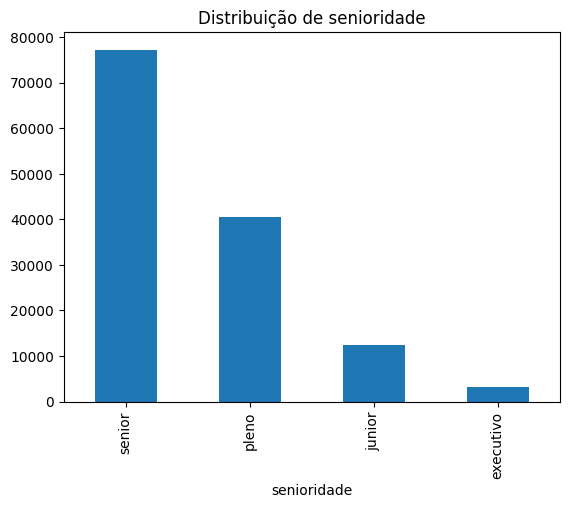

In [21]:
df['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")


In [22]:
import seaborn as sns


<Axes: xlabel='senioridade', ylabel='usd'>

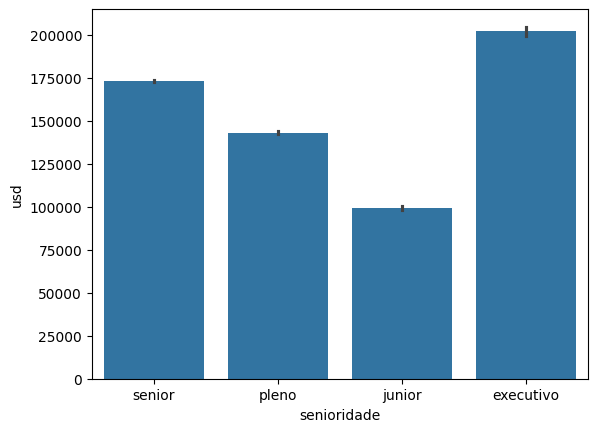

In [23]:
sns.barplot(data=df, x='senioridade', y='usd')


In [24]:
import matplotlib.pyplot as plt


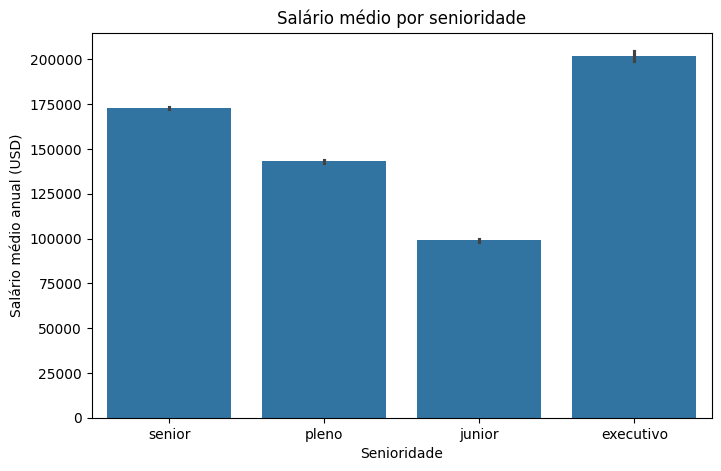

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [32]:
df.groupby('senioridade')['usd'].mean().sort_values(ascending=False)


senioridade
executivo    202027.667813
senior       172850.003845
pleno        143041.323489
junior        99039.040264
Name: usd, dtype: float64

In [34]:
ordem = df.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

ordem


Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

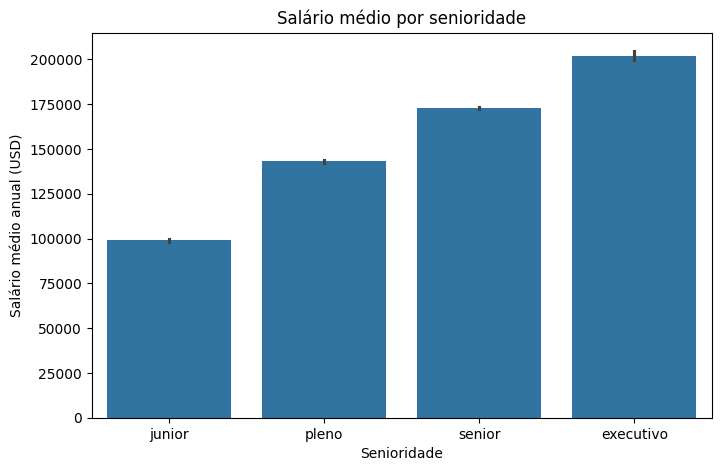

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

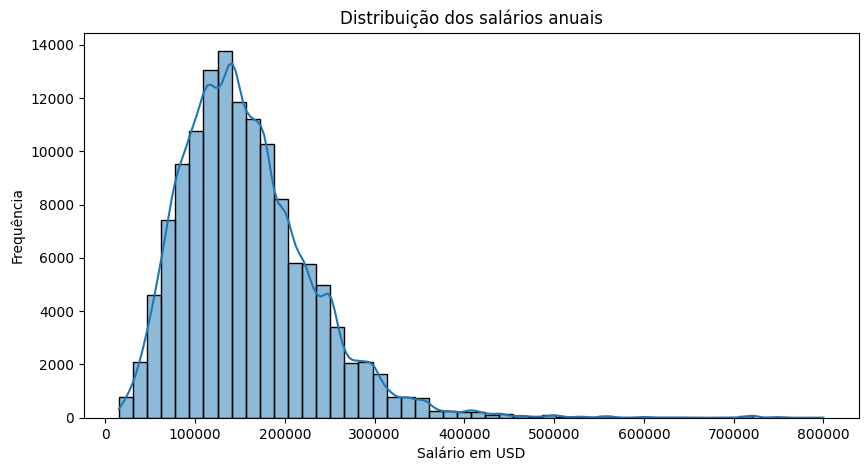

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

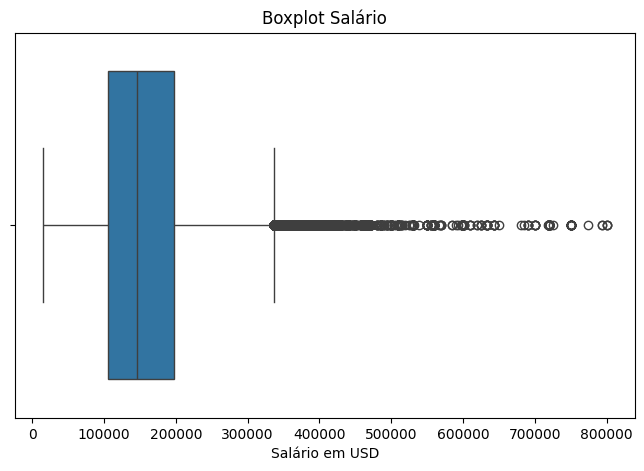

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()
     

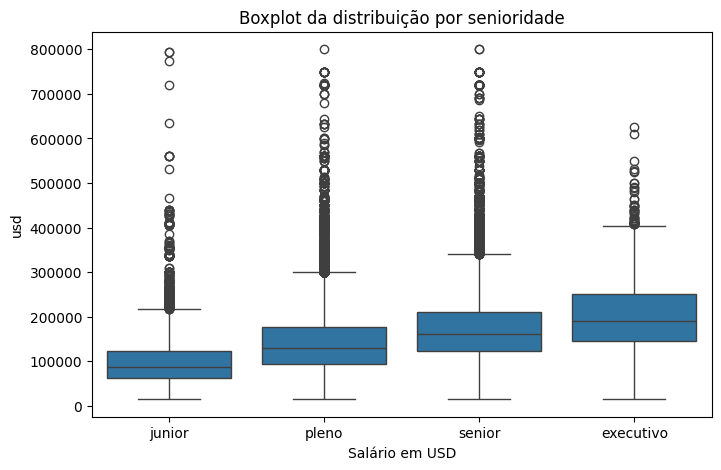

In [46]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

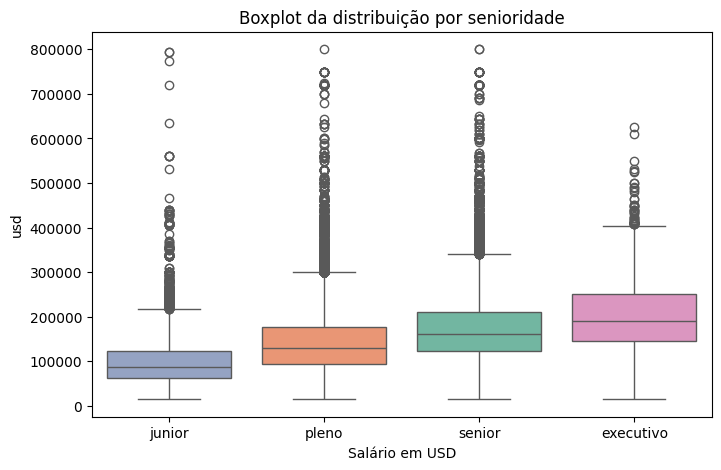

In [48]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [9]:
import plotly.express as px


In [ ]:
senioridade_media_salario = df.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
  x='senioridade',
  y='usd',
  title='Média Salarial por Senioridade',
  labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()
     

In [40]:
remoto_contagem = df['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
   names='tipo_trabalho',
   values='quantidade',
   title='Proporção dos tipos de trabalho'

)

fig.show()

In [41]:
remoto_contagem = df['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
  names='tipo_trabalho',
  values='quantidade',
  title='Proporção dos tipos de trabalho',
  hole=0.5
)

fig.show()

In [42]:
remoto_contagem = df['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
  names='tipo_trabalho',
  values='quantidade',
  title='Proporção dos tipos de trabalho',
  hole=0.5
)
fig.update_traces(textinfo='percent+label')
fig.show()
     

In [5]:
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [6]:
df.to_csv('dados-imersao-final.csv', index=False)
